In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
def linear_function(x, a, b):
    return a * x + b

In [2]:
merfish_data = pd.read_csv('../../data/merfish_gene_region.csv', 
                           sep=',', index_col=0).T

merfish_data

region,AAA,ACAd,ACAv,ACB,ACVII,AD,ADP,AHN,AId,AIp,...,drt,epsc,lfbst,mfbc,mfsbshy,rust,tsp,von,x,y
Htr7,170.340400,470.905500,453.756770,696.15290,2.243777,88.012500,62.203370,508.693450,347.143740,222.881200,...,110.461360,37.327026,62.930040,500.08730,284.293060,81.097275,68.218310,1.014075,5.252450,0.000000
Gzmk,12.267721,42.440950,43.368103,131.79538,0.000000,0.502670,4.273334,10.964284,47.261116,31.574896,...,6.707213,0.952496,8.313000,81.58499,7.019228,5.435312,1.738269,0.000000,0.000000,0.000000
Arhgap36,95.203360,93.138980,77.351370,902.64343,2.851242,19.232195,70.339220,500.643220,98.010070,53.912010,...,54.360653,30.087557,18.304485,378.22745,153.000260,52.869280,59.262890,0.493487,2.216959,0.000000
Sema3c,206.054930,1592.399300,1353.001700,1727.32730,4.206120,93.577255,53.597170,380.918370,1569.221900,1145.772000,...,210.879030,85.544880,157.568450,2000.25400,349.989650,201.728680,150.685610,0.982967,11.083370,3.430973
Rxrg,173.724700,536.519040,381.520720,10948.09500,0.462048,8.907887,41.527164,331.677100,511.515320,405.819460,...,56.951443,31.191002,37.071230,846.24930,123.275040,75.233635,28.628280,0.683844,0.000000,1.506250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gata3,12.998694,62.581425,75.051445,177.17703,1.281542,7.868704,4.045291,24.874680,93.070160,60.292250,...,84.179535,7.250035,30.552664,314.52026,41.298542,79.698650,28.016502,0.000000,0.831088,0.000000
Fat1,403.925600,1700.989900,1726.143400,6142.89450,13.979465,276.972560,144.650590,813.124150,1664.905300,1368.467900,...,671.731260,258.080800,949.712800,12025.28600,1275.809200,551.544400,351.434800,6.669255,37.073875,26.509197
Zim1,179.248300,251.427670,200.200500,644.13580,2.787463,18.481974,77.155815,827.529200,232.349820,192.770450,...,140.479580,47.535343,43.070750,740.14886,258.654630,96.716450,74.467770,0.903264,1.829826,0.736966
Lmo1,61.738434,585.416300,661.485200,1351.19320,5.021787,37.889450,22.545590,196.510700,529.090900,457.196900,...,127.213710,32.330967,87.081230,1284.83670,251.658400,110.050680,66.225600,0.903264,9.691911,1.039726


In [3]:
region_sim = pd.read_csv('../figure1/eucl_region_similarity_using174_region.csv', sep=',', index_col=0)

region_sim

,FRP,MOp,MOs,SSp-n,SSp-bfd,SSp-ll,SSp-m,SSp-ul,SSp-tr,SSp-un,...,SPIV,CENT,CUL,DEC,FOTU,SIM,AN,COPY,PFL,FL
FRP,1.000000,0.701205,0.746701,0.760539,0.791235,0.676851,0.739575,0.647752,0.746334,0.736902,...,0.134753,0.302799,0.154543,0.083386,0.052803,0.299386,0.093394,0.076032,0.118016,0.070755
MOp,0.701205,1.000000,0.874966,0.817356,0.795955,0.786861,0.918361,0.879372,0.637598,0.794357,...,0.106974,0.234783,0.134376,0.068398,0.048277,0.279184,0.077648,0.059424,0.129291,0.058719
MOs,0.746701,0.874966,1.000000,0.869013,0.884186,0.851463,0.915525,0.837040,0.713349,0.894804,...,0.116122,0.257584,0.142511,0.072146,0.050072,0.291861,0.082741,0.064222,0.117162,0.062239
SSp-n,0.760539,0.817356,0.869013,1.000000,0.900155,0.802306,0.873557,0.792269,0.751525,0.865196,...,0.120854,0.265055,0.146522,0.072817,0.050975,0.305422,0.085317,0.066640,0.113474,0.066466
SSp-bfd,0.791235,0.795955,0.884186,0.900155,1.000000,0.810548,0.852457,0.770874,0.775751,0.895481,...,0.126289,0.283654,0.154039,0.078130,0.052340,0.309706,0.089718,0.068243,0.112104,0.066529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIM,0.299386,0.279184,0.291861,0.305422,0.309706,0.311342,0.293598,0.291249,0.330487,0.299581,...,0.097678,0.220708,0.217350,0.084030,0.094220,1.000000,0.099072,0.041921,0.083254,0.057002
AN,0.093394,0.077648,0.082741,0.085317,0.089718,0.079552,0.080415,0.076875,0.094590,0.083111,...,0.318483,0.240166,0.141139,0.079462,0.079608,0.099072,1.000000,0.043231,0.034422,0.063730
COPY,0.076032,0.059424,0.064222,0.066640,0.068243,0.060793,0.061972,0.054752,0.075859,0.066175,...,0.124652,0.100852,0.043797,0.029805,0.021443,0.041921,0.043231,1.000000,0.020892,0.174615
PFL,0.118016,0.129291,0.117162,0.113474,0.112104,0.108920,0.123260,0.122335,0.093388,0.105935,...,0.036082,0.060628,0.048743,0.027647,0.035144,0.083254,0.034422,0.020892,1.000000,0.025671


In [4]:
shared_regions = list(set(merfish_data.columns).intersection(set(region_sim.columns)))
print(len(shared_regions))

merfish_data = merfish_data[shared_regions]
region_sim = region_sim[shared_regions]

169


In [5]:
gene_sim = pd.DataFrame(np.zeros((len(shared_regions),len(shared_regions))),
                        index = merfish_data.columns,
                        columns = merfish_data.columns
                       )
gene_p = pd.DataFrame(np.zeros((len(shared_regions),len(shared_regions))),
                        index = merfish_data.columns,
                        columns = merfish_data.columns
                       )

for i in merfish_data.columns:
    for j in merfish_data.columns:
        tmp_score, tmp_p = stats.pearsonr(merfish_data[i], merfish_data[j])
        gene_sim.loc[i,j] = tmp_score
        gene_p.loc[i,j] = tmp_p

gene_sim

region,APN,IC,ORBvl,PRNc,IRN,SPIV,GRN,CP,MV,TRN,...,AUDp,AIp,BST,ILA,MRN,PSV,PRE,PO,LRN,PAA
region,,,,,,,,,,,,,,,,,,,,,
APN,1.000000,0.854276,0.582258,0.855444,0.877056,0.898057,0.846421,0.468368,0.891980,0.848845,...,0.567336,0.572590,0.764874,0.545820,0.898740,0.885861,0.560240,0.728671,0.848910,0.587560
IC,0.854276,1.000000,0.601126,0.720413,0.757989,0.788247,0.712993,0.537281,0.802595,0.744037,...,0.583989,0.587515,0.726708,0.555872,0.770008,0.780366,0.584362,0.663769,0.745550,0.607521
ORBvl,0.582258,0.601126,1.000000,0.480296,0.509639,0.548072,0.471782,0.518672,0.578420,0.554350,...,0.946298,0.958511,0.655416,0.917878,0.530789,0.507566,0.838554,0.591772,0.526592,0.865058
PRNc,0.855444,0.720413,0.480296,1.000000,0.986546,0.958186,0.996838,0.426236,0.911254,0.888951,...,0.467111,0.466812,0.749318,0.458608,0.978557,0.938668,0.441945,0.645735,0.931056,0.492258
IRN,0.877056,0.757989,0.509639,0.986546,1.000000,0.979773,0.988375,0.451780,0.941795,0.886601,...,0.494622,0.498487,0.769306,0.481481,0.973425,0.948568,0.475695,0.663171,0.947344,0.535965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSV,0.885861,0.780366,0.507566,0.938668,0.948568,0.950880,0.933850,0.431154,0.917806,0.901299,...,0.500324,0.493572,0.703427,0.481169,0.921833,1.000000,0.491975,0.659994,0.921101,0.515248
PRE,0.560240,0.584362,0.838554,0.441945,0.475695,0.518522,0.435650,0.432252,0.547675,0.511003,...,0.829765,0.800778,0.594672,0.777948,0.487335,0.491975,1.000000,0.536148,0.497758,0.739902
PO,0.728671,0.663769,0.591772,0.645735,0.663171,0.696317,0.636523,0.387462,0.708976,0.681962,...,0.593084,0.592937,0.620095,0.532714,0.681665,0.659994,0.536148,1.000000,0.662822,0.596303


In [6]:
region_sim2 = region_sim.loc[shared_regions, shared_regions]
gene_sim2 = gene_sim.loc[shared_regions, shared_regions]

In [7]:
cmp_df = pd.DataFrame()
for i in range(0, len(region_sim2)):
    for j in range(0, len(region_sim2)):
        if i < j:
            continue
        cmp_df = pd.concat([cmp_df,
                            pd.DataFrame({'region1': [region_sim2.columns[i]],
                                          'region2': [region_sim2.columns[j]],
                                          'gene_sim': [gene_sim2.iloc[i,j]],
                                          'region_sim': [region_sim2.iloc[i,j]],
                                         })
                           ], axis=0)
#cmp_df['region_sim'] = (cmp_df['region_sim'] - cmp_df['region_sim'].min()) / (cmp_df['region_sim'].max() - cmp_df['region_sim'].min())

cmp_df

,region1,region2,gene_sim,region_sim
0,APN,APN,1.000000,1.000000
0,IC,APN,0.854276,0.502050
0,IC,IC,1.000000,1.000000
0,ORBvl,APN,0.582258,0.224298
0,ORBvl,IC,0.601126,0.386079
...,...,...,...,...
0,PAA,PSV,0.515248,0.402514
0,PAA,PRE,0.739902,0.522521
0,PAA,PO,0.596303,0.295865
0,PAA,LRN,0.580540,0.121656


In [8]:
cmp_df2 = cmp_df[cmp_df['region1'] != cmp_df['region2']].copy()
cmp_df2

,region1,region2,gene_sim,region_sim
0,IC,APN,0.854276,0.502050
0,ORBvl,APN,0.582258,0.224298
0,ORBvl,IC,0.601126,0.386079
0,PRNc,APN,0.855444,0.445993
0,PRNc,IC,0.720413,0.605618
...,...,...,...,...
0,PAA,MRN,0.551896,0.351359
0,PAA,PSV,0.515248,0.402514
0,PAA,PRE,0.739902,0.522521
0,PAA,PO,0.596303,0.295865


In [9]:
cmp_df3 = cmp_df2.copy() #.sample(500)

In [10]:
cmp_df3['gene_sim_cat'] = -1
n_bin = 50
for i in list(range(1,n_bin+1))[::-1]:
    cmp_df3.loc[cmp_df3['gene_sim']<=i/n_bin, 'gene_sim_cat'] = i

cmp_df3['region_sim_cat'] = -1
for i in list(range(1,n_bin+1))[::-1]:
    cmp_df3.loc[cmp_df3['region_sim']<=i/n_bin, 'region_sim_cat'] = i

# cmp_df3 = cmp_df3[gene_sim['euc_dis_cat'] != -1].copy()
cmp_df3

,region1,region2,gene_sim,region_sim,gene_sim_cat,region_sim_cat
0,IC,APN,0.854276,0.502050,43,26
0,ORBvl,APN,0.582258,0.224298,30,12
0,ORBvl,IC,0.601126,0.386079,31,20
0,PRNc,APN,0.855444,0.445993,43,23
0,PRNc,IC,0.720413,0.605618,37,31
...,...,...,...,...,...,...
0,PAA,MRN,0.551896,0.351359,28,18
0,PAA,PSV,0.515248,0.402514,26,21
0,PAA,PRE,0.739902,0.522521,37,27
0,PAA,PO,0.596303,0.295865,30,15


In [11]:
#cmp_df3['gene_sim'] = np.sqrt(cmp_df3['gene_sim'])

<Axes: xlabel='gene_sim', ylabel='Count'>

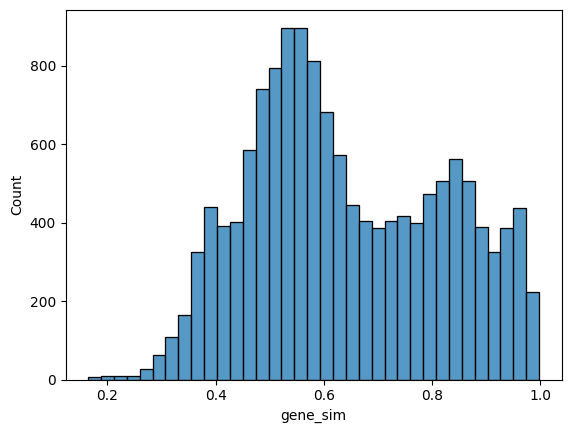

In [12]:
sns.histplot(cmp_df3, x='gene_sim')

<Axes: xlabel='region_sim', ylabel='Count'>

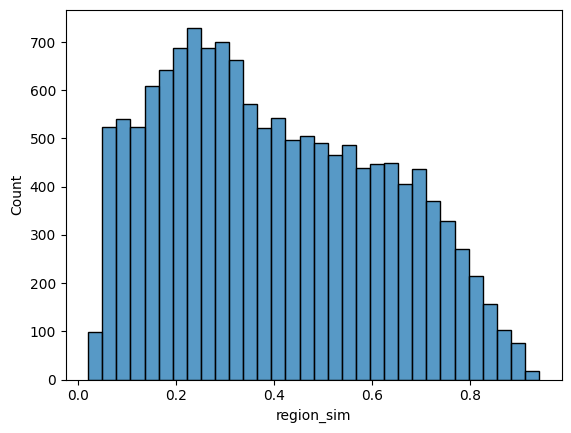

In [13]:
sns.histplot(cmp_df3, x='region_sim')

In [14]:
cross_df = pd.crosstab(cmp_df3['gene_sim_cat'], cmp_df3['region_sim_cat'])

cross_df2 = pd.DataFrame(np.zeros((n_bin, n_bin)),
                         index=range(1, n_bin+1),
                         columns=range(1, n_bin+1)
                        )
cross_df2.index.name = 'gene_sim_cat'
cross_df2.columns.name = 'region_sim_cat'

for i in cross_df.index:
    for j in cross_df.columns:
        cross_df2.loc[i, j] = cross_df.loc[i, j]

# cross_df = cross_df.iloc[::-1,]
cross_df2

region_sim_cat,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
gene_sim_cat,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import numpy as np
import pandas as pd

masked = np.ma.masked_equal(cross_df2.values, 0)

median = np.ma.median(masked)
mad = np.ma.median(np.abs(masked - median))
robust_z = 0.6745 * (masked - median) / mad

thresh = 3.5
mask_np = np.abs(robust_z.filled(np.nan)) > thresh
mask_df = pd.DataFrame(mask_np,
                      index=cross_df2.index,
                      columns=cross_df2.columns)

idx_pairs = mask_df.stack()[mask_df.stack()].index.tolist()

print(len(idx_pairs))

from scipy.ndimage import uniform_filter

mean_8nb = uniform_filter(cross_df2, size=3, mode='mirror') * 9/8 - cross_df2/8

cross_df2[mask_df] = mean_8nb[mask_df]

27


In [16]:
x = cmp_df3['region_sim_cat']
y = n_bin - cmp_df3['gene_sim_cat']

params, covariance = curve_fit(linear_function, x, y)
a, b = params
x_fit = np.linspace(min(x-1), max(x+1), 100)
y_fit = linear_function(x_fit, a, b)
covariance

array([[ 3.74864327e-05, -7.71952225e-04],
       [-7.71952225e-04,  2.04589785e-02]])

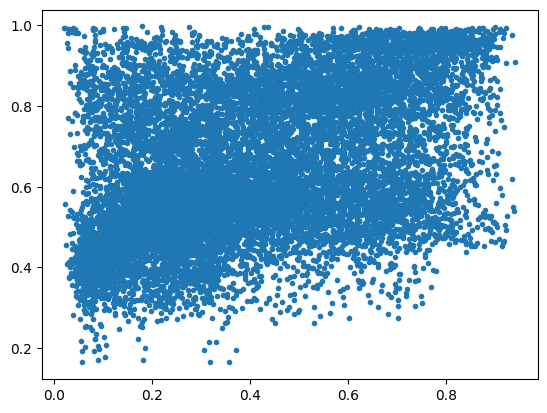

In [17]:
plt.plot(cmp_df3['region_sim'], cmp_df3['gene_sim'], '.')

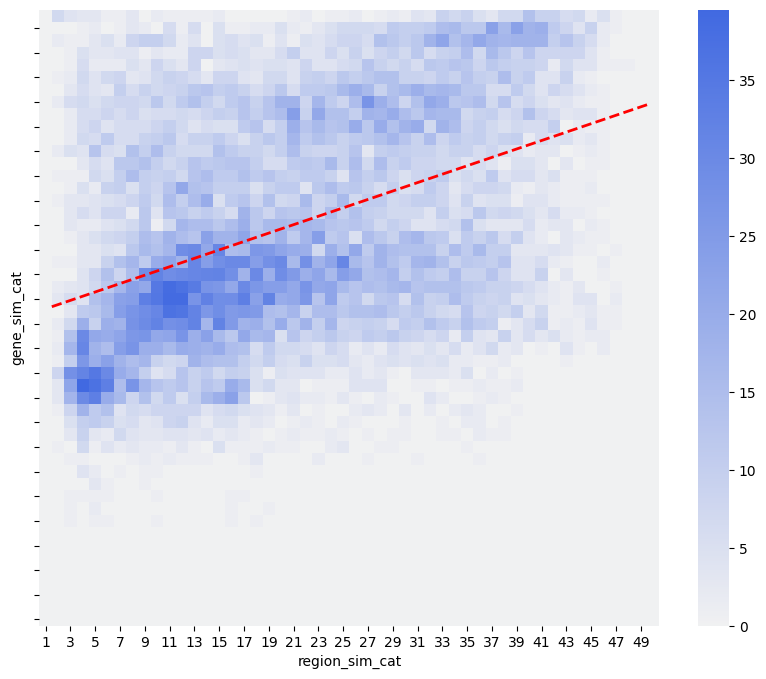

In [28]:
f, ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(cross_df2.iloc[::-1, ], 
            cmap=sns.color_palette("light:royalblue", as_cmap=True),
            # mask=cross_df<=0
           )

plt.plot(x_fit, y_fit, color='red', 
         linewidth=2, linestyle='--',
         label='Fitted Curve')

tick_pos = np.arange(0, n_bin, 2)
plt.xticks(tick_pos+0.5, rotation=0)
plt.yticks(tick_pos+1.5, rotation=0)

#plt.xlim([0, 50])
#plt.xticks(np.array([0, 10, 20, 30, 40, 50])+1)

#plt.savefig('./cmp_gene_sim_using_merfish.png', dpi=400, bbox_inches='tight')
plt.savefig('./merfish_ppss.svg', bbox_inches='tight')
plt.show()

In [19]:
# if not use_ave:
#     cmp_df4 = cmp_df3[(cmp_df3['region_sim']>=0.21)&(cmp_df3['gene_sim']<=1)].copy() # residual
# else:
#     cmp_df4 = cmp_df3[(cmp_df3['region_sim']>=0.22)&(cmp_df3['region_sim']<=1)].copy() # ave
cmp_df4 = cmp_df3[(cmp_df3['region_sim']>=0.0)&(cmp_df3['region_sim']<=1)].copy()
print(stats.pearsonr(cmp_df4['gene_sim_cat'], 
               cmp_df4['region_sim_cat']))

print(stats.pearsonr(cmp_df4['gene_sim'], 
               cmp_df4['region_sim']))

PearsonRResult(statistic=0.42402533961010397, pvalue=0.0)
PearsonRResult(statistic=0.4239435011718654, pvalue=0.0)


In [20]:
cmp_df4['gene_sim_cat']

0    43
0    30
0    31
0    43
0    37
     ..
0    28
0    26
0    37
0    30
0    30
Name: gene_sim_cat, Length: 14196, dtype: int64